## 6.4 Supervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create Path to create folder into a string
path = r'C:\Users\E054746\OneDrive - RSM\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\US Regional Sales Analysis'

In [4]:
# Import US Regional Sales Data (scrubbed version)
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_regional_sales_clean_020222.pkl'))

### 2. Question 3 - Data cleaning

In [5]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Warehouse_Code', 'Procured_Date',
       'Order_Date', 'Months_In_Stock', 'Ship_Date', 'Days_To_Process_Order',
       'Delivery_Date', 'Days_In_Transit', 'SalesTeam_ID', 'Customer_ID',
       'Store_ID', 'Product_ID', 'Order_Quantity', 'Discount_Applied',
       'Unit_Price', 'Unit_Cost', 'Discounted_Price_PU', 'Total_Sale',
       'Total Cost', 'Total Profit', 'Customer_Names', 'Product_Name',
       'City_Name', 'County', 'State_Code', 'State', 'Type', 'Latitude',
       'Longitude', 'Population', 'Household_Income', 'Median_Income',
       'Time_Zone', 'Region', 'Sales_Team'],
      dtype='object')

In [7]:
# set the max columns to none
pd.set_option('display.max_columns', None)
df.head(20)

,Order_Number,Sales_Channel,Warehouse_Code,Procured_Date,Order_Date,Months_In_Stock,Ship_Date,Days_To_Process_Order,Delivery_Date,Days_In_Transit,SalesTeam_ID,Customer_ID,Store_ID,Product_ID,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Discounted_Price_PU,Total_Sale,Total Cost,Total Profit,Customer_Names,Product_Name,City_Name,County,State_Code,State,Type,Latitude,Longitude,Population,Household_Income,Median_Income,Time_Zone,Region,Sales_Team
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,5,2018-06-14,14,2018-06-19,5,6,15,259,12,5,0.075,1963.1,1001.181,1815.8675,9079.3375,5005.905,4073.4325,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
1,SO - 0005035,In-Store,WARE-UHY1004,2019-08-23,2020-01-08,4,2020-01-15,7,2020-01-21,6,6,47,259,1,3,0.150,1755.4,1298.996,1492.0900,4476.2700,3896.988,579.2820,Niconovum Corp,Cookware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
2,SO - 0006409,In-Store,WARE-UHY1004,2020-03-10,2020-06-17,3,2020-07-03,16,2020-07-12,9,6,41,259,16,5,0.075,3544.3,2020.251,3278.4775,16392.3875,10101.255,6291.1325,Weimei Corp,Stemware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
3,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,4,2020-08-15,25,2020-08-16,1,6,48,259,6,3,0.075,2492.4,1246.200,2305.4700,6916.4100,3738.600,3177.8100,"Fenwal, Corp",Computers,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
4,SO - 0007028,In-Store,WARE-NMK1003,2020-06-18,2020-08-29,2,2020-09-11,13,2020-09-14,3,6,44,112,14,3,0.200,3993.2,3034.832,3194.5600,9583.6800,9104.496,479.1840,Winthrop,Mirrors,Waterbury (Town),New Haven County,CT,Connecticut,Town,41.55850,-73.03668,108802,40213,40467,America/New York,Northeast,Joshua Bennett
5,SO - 0004294,In-Store,WARE-MKL1006,2019-05-15,2019-10-10,4,2019-10-12,2,2019-10-18,6,6,14,344,28,7,0.050,3872.6,2633.368,3678.9700,25752.7900,18433.576,7319.2140,Linde,Phones,Wichita Falls,Wichita County,TX,Texas,City,33.91371,-98.49339,104710,37200,44543,America/Chicago,South,Joshua Bennett
6,SO - 0006033,In-Store,WARE-NMK1003,2020-03-10,2020-05-04,1,2020-05-18,14,2020-05-28,10,6,36,126,1,4,0.200,871.0,426.790,696.8000,2787.2000,1707.160,1080.0400,O.E. Ltd,Cookware,Miami,Miami-Dade County,FL,Florida,City,25.77427,-80.19366,441003,157347,31051,America/New York,South,Joshua Bennett
7,SO - 0006549,In-Store,WARE-PUJ1005,2020-03-10,2020-07-04,3,2020-07-30,26,2020-08-04,5,6,43,322,7,7,0.075,5762.0,3514.820,5329.8500,37308.9500,24603.740,12705.2100,"Exact-Rx, Corp",Dinnerware,Grand Prairie,Tarrant County/Ellis County/Dallas County,TX,Texas,City,32.68695,-97.02110,187809,59196,56475,America/Chicago,South,Joshua Bennett
8,SO - 0005209,In-Store,WARE-UHY1004,2019-08-23,2020-01-27,5,2020-02-06,10,2020-02-14,8,6,11,241,47,5,0.075,221.1,163.614,204.5175,1022.5875,818.070,204.5175,Apollo Ltd,Audio,Manchester,Hillsborough County,NH,New Hampshire,City,42.99564,-71.45479,110229,45145,54282,America/New York,Northeast,Joshua Bennett
9,SO - 0006674,In-Store,WARE-NMK1003,2020-03-10,2020-07-17,4,2020-08-11,25,2020-08-15,4,6,9,161,6,8,0.075,194.3,110.751,179.7275,1437.8200,886.008,551.8120,Ei,Computers,Joliet,Kendall County/Will County,IL,Illinois,City,41.51770,-88.14885,147861,46895,60976,America/Chicago,Midwest,Joshua Bennett


In [8]:
df.shape

(7991, 37)

##### Missing values

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Order_Number             0
Sales_Channel            0
Warehouse_Code           0
Procured_Date            0
Order_Date               0
Months_In_Stock          0
Ship_Date                0
Days_To_Process_Order    0
Delivery_Date            0
Days_In_Transit          0
SalesTeam_ID             0
Customer_ID              0
Store_ID                 0
Product_ID               0
Order_Quantity           0
Discount_Applied         0
Unit_Price               0
Unit_Cost                0
Discounted_Price_PU      0
Total_Sale               0
Total Cost               0
Total Profit             0
Customer_Names           0
Product_Name             0
City_Name                0
County                   0
State_Code               0
State                    0
Type                     0
Latitude                 0
Longitude                0
Population               0
Household_Income         0
Median_Income            0
Time_Zone                0
Region                   0
Sales_Team               0
d

##### Duplicates check

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(7991,)

##### Extreme values checks

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Sale', ylabel='Density'>

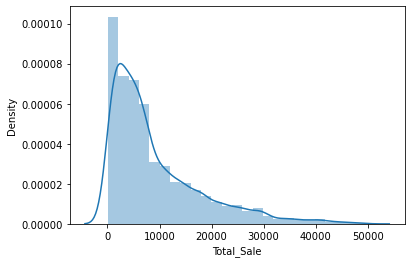

In [12]:
sns.distplot(df['Total_Sale'], bins=25) # Shows extreme values

In [13]:
df['Total_Sale'].mean() # Check the mean

9153.21984044549

In [14]:
df['Total_Sale'].median() # Check the median

6127.82

In [15]:
df['Total_Sale'].max() # Check the max

49697.92

### 3. Data prep for regression analysis 

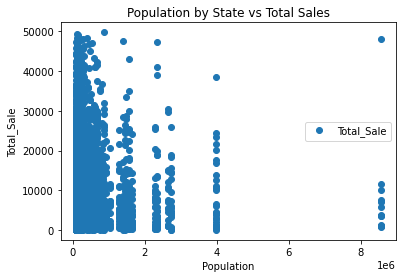

In [16]:
# Question 4 - Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Population', y='Total_Sale',style='o')
plt.title('Population by State vs Total Sales')  
plt.xlabel('Population')  
plt.ylabel('Total_Sale')  
plt.show()

#### Question 5 - Hypothesis: If a store is located in a larger population, the higher the sales the store will have.

In [17]:
# Question 6 - Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Population'].values.reshape(-1,1)
y = df['Total_Sale'].values.reshape(-1,1)

In [19]:
X

array([[213776],
       [213776],
       [213776],
       ...,
       [228590],
       [623747],
       [140074]], dtype=int64)

In [20]:
y

array([[ 9079.3375],
       [ 4476.27  ],
       [16392.3875],
       ...,
       [24484.48  ],
       [ 4212.96  ],
       [22353.88  ]])

In [21]:
# Question 7 - Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Questions 8-9 Regression analysis

In [22]:
# Create a regression object to fit onto the training set

regression = LinearRegression()

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

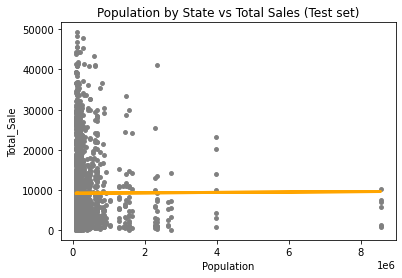

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Population by State vs Total Sales (Test set)')
plot_test.xlabel('Population')
plot_test.ylabel('Total_Sale')
plot_test.show()

#### Question 10 - Based on the plot above, it doesn't seem that there is a correlation between a larger population and sales. In fact, it looks like the average sales is almost $10,000 and most of the sales in lower populations are above the average.

In [26]:
# Question 11 - Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [27]:
#  Question 11 continued - Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.05567897e-05]]
Mean squared error:  75826576.79033548
R2 score:  -0.001893608551373882


In [28]:
y_predicted

array([[9249.37741816],
       [9263.82543641],
       [9250.62136797],
       ...,
       [9253.07038942],
       [9249.43753018],
       [9250.99311204]])

In [29]:
# Question 13 - Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,20453.7600,9249.377418
1,9452.0250,9263.825436
2,22210.5000,9250.621368
3,325.6200,9252.280490
4,1560.4300,9249.341826
5,13495.1400,9254.985430
6,818.0700,9287.925403
7,1088.4150,9250.894577
8,204.5175,9253.062452
9,14206.6800,9253.085455


#### Question 13 Refelctions on how the regression model performed
Based on the regression model and the coefficient being 0, it seems that there is no correlation when it comes to population and total sales. In fact, the Mean Squared Error is extremely large and the R2 square is less than 1%, which leads me to believe that my model is not performing well. 

After doing a comparison with the actual values and predicted values, I can see that there's quite a difference in each set. This test just validates that the model is not performing well. 